# Utledning av Stackelberg med python og sympy

Laster nødvendige pakker:

In [3]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

In [4]:
Q, Q1, Q2, mc, mc1,mc2, a, b, pi=symbols('Q Q1 Q2 mc mc1 mc2 a b pi')

def P_demand(Q,a,b):
    return a-b*Q

def profit(Q1,Q2,mc,a,b):
    return (P_demand(Q1+Q2,a,b)-mc)*Q1

### Marginalinntekt

Legg merke til at vi her kun utleder bedrift 2 sin optimale reaksjon. Dette er bedriften som følger etter, og bedrift 1 kan ta hensyn til denne i sin optimalisering.

In [5]:
def d_profit2_Q(Q2,Q1,mc2,a,b):
    return diff(profit(Q2,Q1,mc2,a,b),Q2)
d_profit2_Q(Q2,Q1,mc2,a,b)

-Q2*b + a - b*(Q1 + Q2) - mc2

### Responsfunksjon bedrift 2:

Setter vi denne lik null får vi førsteordensbetingelsen. Løser for det for å finne responsfunksjonen til bedrift 2:

In [6]:
def response2(Q1,mc2,a,b):
    return solve(d_profit2_Q(Q2,Q1,mc2,a,b),Q2)[0]
response2(Q1,mc2,a,b)

(-Q1*b + a - mc2)/(2*b)

### Optimal mengde bedrift 1

Over har vi nå kvantumet som 2 vil velge. Vi kan nå sette dette inn i profittfunksjonen til 1, og derivere:

In [7]:
def d_profit1_Q(Q1,a,b,mc1,mc2):
    return diff(profit(Q1,response2(Q1,mc2,a,b),mc1,a,b),Q1)
d_profit1_Q(Q1,a,b,mc1,mc2)

-Q1*b/2 + a - b*(Q1 + (-Q1*b + a - mc2)/(2*b)) - mc1

Løser for å finne optimalt mengde for bedrift 1:

In [8]:
def Q1_sol(a,b,mc1,mc2):
    return solve(d_profit1_Q(Q1,a,b,mc1,mc2),Q1)[0]
Q1_sol(a,b,mc1,mc2)

(a - 2*mc1 + mc2)/(2*b)

### Løsning mengde bedrift 2:

Setter inn i tilbudet til 2:

In [9]:
def Q2_sol(a,b,mc1,mc2):
    return response2(Q1,mc2,a,b).subs({Q1: Q1_sol(a,b,mc1,mc2)})
Q2_sol(a,b,mc1,mc2)

(a/2 + mc1 - 3*mc2/2)/(2*b)

### Løsningsfunksjon:

Legger de to løsningene inn i en funksjon vi kaller `stackelberg`

In [11]:
def stackelberg(a,b,mc1,mc2):
    return  (Q1_sol(a,b,mc1,mc2),Q2_sol(a,b,mc1,mc2))
stackelberg(a,b,mc1,mc2)

((a - 2*mc1 + mc2)/(2*b), (a/2 + mc1 - 3*mc2/2)/(2*b))

# Grafisk fremstilling:

### Isokvanten:

For å fremstille løsningen grafisk, trenger vi isokvanten til bedrift 1. Bedrift 1 ønsker å velge isokvanten med høyest profitt, som også er på bedrift 1 sin responskurve. Gitt et profittnivå pi1, er isokvanten alle kombinasjoner av Q1 og Q2 som gir denne profitten:

In [15]:

def isoquant1(Q1,a,b,mc1,pi1):
    Q2_sol = solve(profit(Q1,Q2,mc1,a,b)-pi1,Q2)
    #checks if there is a solution:
    if len(Q2_sol):
        try:#will raise exeption if symbolic
            if float(Q2_sol[0])>0:
                return float(Q2_sol[0])
            else:
                return None
        except:
            return Q2_sol[0]


isoquant1(Q1,a,b,mc1,pi)

-Q1 + a/b - mc1/b - pi/(Q1*b)

### Figur:

Definerer parametrene i modellen

In [16]:
q1 = np.linspace(0,30,100)
q2 = np.linspace(0,12,100)
a_value=40
b_value=1
mc1_value=5
mc2_value=10

Lager figur:

Løsningen er at 
bedrift 1 produserer 20 og tjener 200
bedrift 2 produserer 5 og tjener 25
prisen blir 15





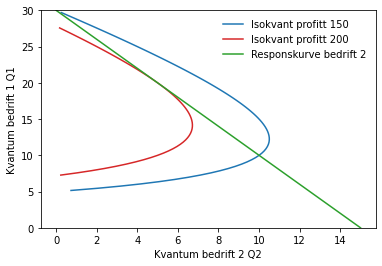

In [17]:


fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 1 Q1')
ax.set_xlabel('Kvantum bedrift 2 Q2')


#drawing respons curves
pi_val=150

ax.plot([isoquant1(i,a_value,b_value,mc1_value,pi_val) for i in q1],
        q1,
        label=f'Isokvant profitt {pi_val}', 
        color = 'tab:blue'
       )

pi_val=200
ax.plot([isoquant1(i,a_value,b_value,mc1_value,pi_val) for i in q1],
        q1,
        label=f'Isokvant profitt {pi_val}', 
        color = 'tab:red'
       )
ax.plot(
        [response2(i,mc2_value, a_value,b_value) for i in q1],
        q1,
        label='Responskurve bedrift 2',
        color = 'tab:green'
       )

#setting range for y-axis. 
plt.ylim((0,30))

#adding legend:
ax.legend(loc='upper right',frameon=False)

Q1sol, Q2sol=stackelberg(a_value,b_value,mc1_value,mc2_value)

print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} og tjener {profit(Q1sol,Q2sol,mc1_value,a_value,b_value)}
bedrift 2 produserer {Q2sol} og tjener {profit(Q2sol,Q1sol,mc2_value,a_value,b_value)}
prisen blir {P_demand(Q1sol+Q2sol,a_value,b_value)}


""")

## Løsning:

In [18]:
Q1sol, Q2sol=stackelberg(a_value,b_value,mc1_value,mc2_value) 
print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} og tjener {profit(Q1sol,Q2sol,mc1_value,a_value,b_value)}
bedrift 2 produserer {Q2sol} og tjener {profit(Q2sol,Q1sol,mc2_value,a_value,b_value)}
prisen blir {P_demand(Q1sol+Q2sol,a_value,b_value)}
""")

Løsningen er at 
bedrift 1 produserer 20 og tjener 200
bedrift 2 produserer 5 og tjener 25
prisen blir 15

